In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from os import system as sys
import profile_maker
import wb_writer

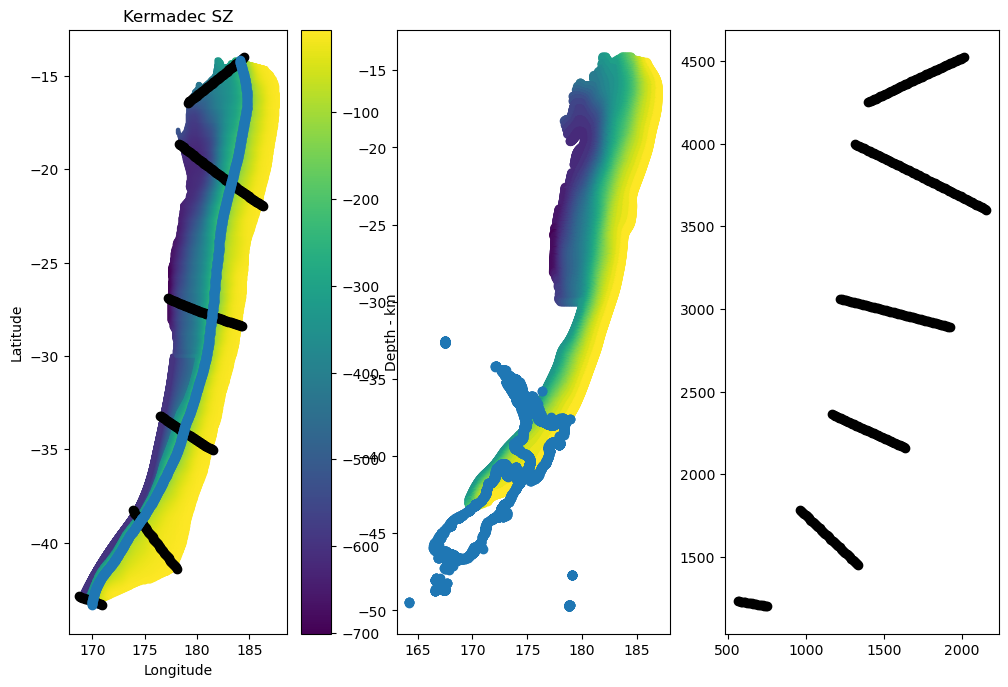

In [86]:
sys('rm -r SZ_data/kermadec/cartesian/.ipynb_checkpoints')
coast_arr = np.loadtxt(fname="../data/coastline.txt")
slab2_cont = np.loadtxt(fname='SZ_data/kermadec/slab2_tonga.in', delimiter='\t', comments='>', dtype=float)
# slab2_dep = np.loadtxt(fname='SZ_data/kermadec/slab2_tonga.xyz', delimiter=',', comments='>')
slab2_dep = np.loadtxt(fname='../data/combined_slab2.txt')
slab2_cont = np.array(sorted(slab2_cont, key=lambda x: x[1], reverse=True))

depth_contour = -200
prof_num = 5
profile_spacing = 10
lon_spacing = 0.5
lat_spacing = 0.5
max_distance_point = 25.0
region_lon = [170, 190]
region_lat = [-50, -14]
output_dir = 'SZ_data/kermadec'
truncate = False
profile_maker.profile_generator(slab2_dep, slab2_cont, output_dir, depth_contour, prof_num, profile_spacing, region_lon, region_lat, \
                                lon_spacing, lat_spacing, max_distance_point, 90, 'East', truncate)
plt.figure(dpi=100, figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.title('Kermadec SZ')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.scatter(slab2_dep[:,0], slab2_dep[:,1], c=slab2_dep[:,2], s = 5)
plt.colorbar(label = 'Depth - km')
#poly = np.loadtxt(fname='polygon.txt')
for file in np.sort(os.listdir(output_dir + '/geographic')):
    profile_file = np.loadtxt(fname=output_dir + '/geographic/' + file)
    plt.scatter(profile_file[:, 0], profile_file[:, 1], c = 'k')
plt.scatter(slab2_cont[np.where(slab2_cont[:, 2] == depth_contour)][:, 0], slab2_cont[np.where(slab2_cont[:, 2] == depth_contour)][:, 1])
plt.subplot(1, 3, 2)
plt.scatter(slab2_cont[:, 0], slab2_cont[:, 1], c = slab2_cont[:, 2])
plt.scatter(coast_arr[:, 0], coast_arr[:, 1])
plt.subplot(1, 3, 3)
for file in np.sort(os.listdir(output_dir + '/cartesian')):
    profile_file = np.loadtxt(fname=output_dir + '/cartesian/' + file)
    plt.scatter(profile_file[:, 0] + 1500, profile_file[:, 1] + 2500, c = 'k')

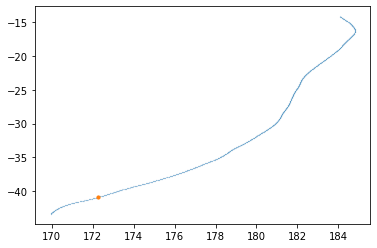

In [88]:
test_index = 800
plt.scatter(slab2_cont[np.where(slab2_cont[:, 2] == depth_contour)][:, 0], slab2_cont[np.where(slab2_cont[:, 2] == depth_contour)][:, 1], s = 0.01)
plt.scatter(slab2_cont[np.where(slab2_cont[:, 2] == depth_contour)][:, 0][test_index], slab2_cont[np.where(slab2_cont[:, 2] == depth_contour)][:, 1][test_index], s = 10)


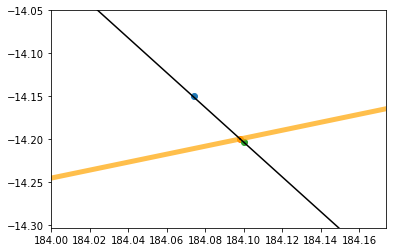

In [127]:
import geopy
from geopy.distance import geodesic
from geopy.distance import distance
from os import system as sys
import pyproj
geodesic = pyproj.Geod(ellps='WGS84')

sys('rm -r SZ_data/kermadec/cartesian/.ipynb_checkpoints')
coast_arr = np.loadtxt(fname="../data/coastline.txt")
slab_depth_contour = np.loadtxt(fname='SZ_data/kermadec/slab2_tonga.in', delimiter='\t', comments='>', dtype=float)
# slab2_dep = np.loadtxt(fname='SZ_data/kermadec/slab2_tonga.xyz', delimiter=',', comments='>')
slab2_dep = np.loadtxt(fname='../data/combined_slab2.txt')
slab_depth_contour = np.array(sorted(slab_depth_contour, key=lambda x: x[1], reverse=True))

depth_of_contour = -200
num_of_profiles = 5
profile_spacing = 10
lon_spacing = 0.5
lat_spacing = 0.5
max_distance_point = 25.0
region_lon = [170, 190]
region_lat = [-50, -14]
output_dir = 'SZ_data/kermadec'
truncate = False

slab_depth_contour_cut = slab_depth_contour[ np.where( (slab_depth_contour[:, 0] <= np.max(region_lon)) & (slab_depth_contour[:, 0] >= np.min(region_lon)) \
                                                & (slab_depth_contour[:, 1] <= np.max(region_lat)) & (slab_depth_contour[:, 1] >= np.min(region_lat)) ) ]   

contour_indices = np.where(slab_depth_contour_cut[:, 2] == depth_of_contour)
contour_arr = np.flipud(slab_depth_contour_cut[contour_indices])
contour_points = contour_arr.shape[0]
contour_interval = np.floor(contour_points / num_of_profiles)

n = 0
for i in np.arange(0, contour_points, contour_interval, dtype=int):
    if i == (contour_points):
        fwd_az1, back_az1, dist1 = geodesic.inv(contour_arr[i-1, 0], contour_arr[i-1, 1], contour_arr[i, 0], contour_arr[i, 1]) # azimuth 1
        fwd_az2 = fwd_az1
            # The following Point (this condition is for the first point of the profile)
    elif i == 0:
        fwd_az1, back_az1, dist1 = geodesic.inv(contour_arr[i, 0], contour_arr[i, 1], contour_arr[i + 1, 0], contour_arr[i + 1, 1]) # azimuth 1
        fwd_az2 = fwd_az1
        # All other points, using the previous and following point
    else:
        fwd_az1, back_az1, dist1 = geodesic.inv(contour_arr[i-1, 0], contour_arr[i-1, 1], contour_arr[i, 0], contour_arr[i, 1]) # azimuth 1
        fwd_az2, back_az2, dist2 = geodesic.inv(contour_arr[i, 0], contour_arr[i, 1], contour_arr[i+1, 0], contour_arr[i+1, 1]) # azimuth 2
    
    az = (fwd_az1 + fwd_az2)/2.
    
    if n == 5:
        plt.scatter(contour_arr[i+1, 0], contour_arr[i+1, 1])
        plt.scatter(contour_arr[i, 0], contour_arr[i, 1])
        plt.scatter(contour_arr[i-1, 0], contour_arr[i-1, 1])
        plt.xlim(contour_arr[i-1,0] - .1, contour_arr[i+1,0] + .1)
        plt.ylim(contour_arr[i-1,1] - .1, contour_arr[i+1,1] + .1)
        sys("gmt project -C%s/%s -A%s -G%s -L0/%s -Q -Dg > positive_profile.xyd" % (contour_arr[i, 0], contour_arr[i, 1],az + 180, profile_spacing, 1000))
        sys("gmt project -C%s/%s -A%s -G%s -L0/%s -Q -Dg > negative_profile.xyd" % (contour_arr[i, 0], contour_arr[i, 1],az - 0, profile_spacing, 1000))
    n += 1

        # Average azimuth, which is used to create a great circle profile perpendicular to the depth contour 

# for file in np.sort(os.listdir(output_dir + '/geographic')):
profile_file = np.loadtxt(fname=output_dir + '/geographic/' + 'profile_00890.txt')
plt.plot(profile_file[:, 0], profile_file[:, 1], c = 'orange', alpha = 0.7, lw=5)
pos_file = np.loadtxt(fname='positive_profile.xyd')
neg_file = np.loadtxt(fname='negative_profile.xyd')
plt.plot(pos_file[:, 0], pos_file[:, 1], c = 'k')
plt.plot(neg_file[:, 0], neg_file[:, 1], c = 'k')

In [128]:
len(contour_arr)

892

In [32]:
for i in np.arange(0, contour_points, contour_interval, dtype=int):
    print(contour_arr[i - 1, 0], contour_arr[i - 1, 1])
    print(contour_arr[i, 0], contour_arr[i, 1])
    print(contour_arr[i + 1, 0], contour_arr[i + 1, 1])
    print('  ')

184.6765 -17.0
170.0 -43.1295
170.0107 -43.1
  
174.15 -39.1767
174.1848 -39.15
174.2 -39.1386
  
178.1657 -35.05
178.1975 -35.0
178.2 -34.996
  
181.0 -29.7296
181.0097 -29.7
181.0255 -29.65
  
182.35 -22.9416
182.3623 -22.9
182.3775 -22.85
  
184.65 -17.0787
184.6597 -17.05
184.6765 -17.0
  


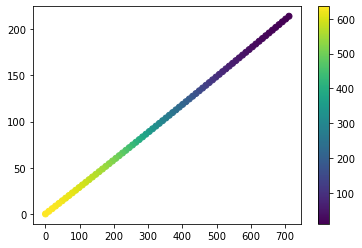

In [3]:
big_test = np.loadtxt(fname='SZ_data/kermadec/cartesian/profile_00652.xyz')
big_test_x = big_test[:, 0] - np.min(big_test[:, 0])
big_test_y = np.abs(big_test[:, 1] - np.max(big_test[:, 1]))
big_test_z = np.abs(big_test[:, 2])
plt.scatter(big_test_x, np.abs(big_test_y), c = np.abs(big_test_z))
plt.colorbar()

In [4]:
segment_thickness = []
segment_length = []
dip_holder = []
slab_distances = []
for i in range(1, len(big_test_z)):
        segment_thickness.append([125e3])
        slab_distance = np.sqrt( (big_test_x[i] - big_test_x[i - 1])**2 + (big_test_y[i] - big_test_y[i - 1])**2 + (big_test_z[i] - big_test_z[i - 1])**2)
        slab_distances.append(slab_distance)
        riserun = (big_test_z[i - 1] - big_test_z[i]) / (slab_distance)
        segment_length.append(slab_distance * 1000)
        dip_holder.append(np.arctan(abs(riserun)) * 180 / np.pi)

dips = []
for k in range(len(dip_holder) - 1):
    if k != int(len(dip_holder) - 1):
        dips.append([dip_holder[k], dip_holder[k + 1]])
    else:
        dips.append([dip_holder[k]])

In [5]:
depths = [0, 0]
depth_val = 0
for i in range(len(dips)):
    depth_val += np.arctan(np.pi * dips[i][1] / 180) * slab_distances[i]
    depths.append(depth_val)

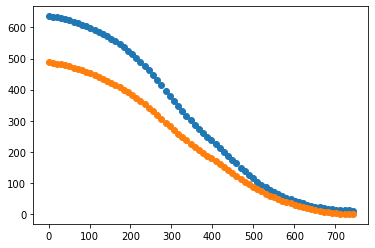

In [6]:
plt.scatter(np.sqrt(big_test_x**2 + big_test_y**2), np.abs(big_test_z))
plt.scatter(np.sqrt(big_test_x**2 + big_test_y**2), depths)

# Load in the Dip Data from the Slab2 Database to see how our dips compare to theirs

In [7]:
slab2_dips = np.loadtxt(fname='SZ_data/kermadec/slab2_tonga_dip.xyz', delimiter=',')
lon_full = slab2_dips[:, 0]
lat_full = slab2_dips[:, 1]
dip_full = slab2_dips[:, 2]
nan_index = np.where(np.isfinite(dip_full))
lon_dips = lon_full[nan_index]
lat_dips = lat_full[nan_index]
dip_dips = dip_full[nan_index]
new_arr = np.array([lon_dips, lat_dips, dip_dips])
np.savetxt(fname='SZ_data/kermadec/tonga_dips.xyz', X=new_arr.T)

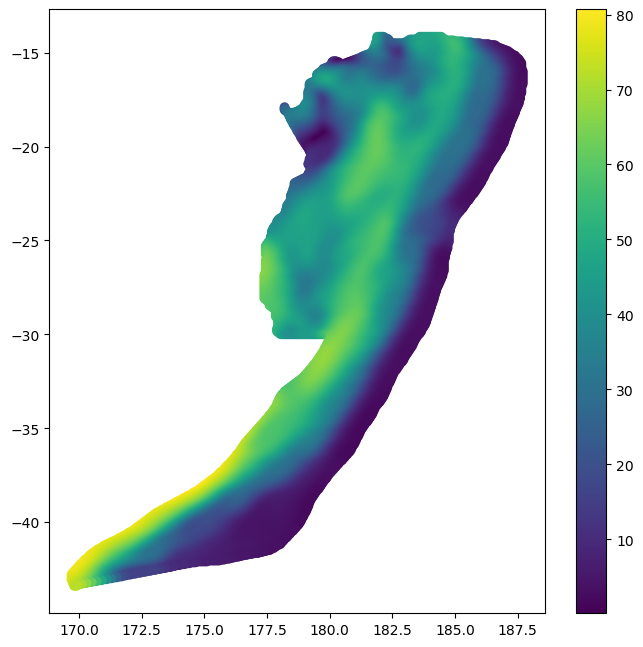

In [8]:
plt.figure(dpi = 100, figsize=(8,8))
plt.scatter(lon_dips, lat_dips, c=dip_dips)
plt.colorbar()

# Do the profile script, but instead of extracting depth to slab extract the dip at the point

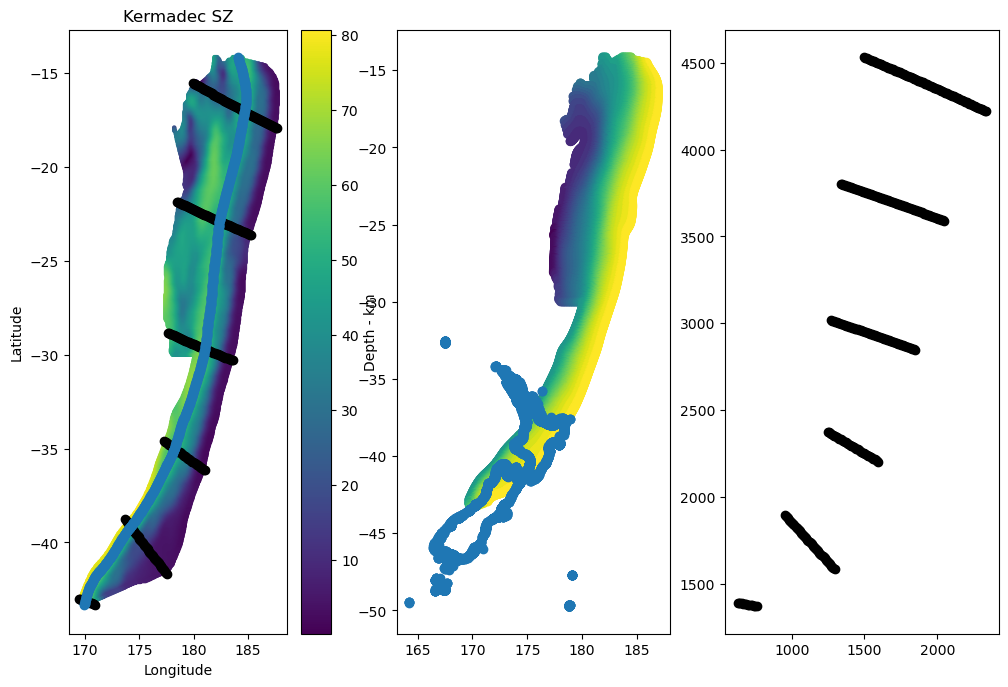

In [9]:
sys('rm -r SZ_data/kermadec/cartesian/.ipynb_checkpoints')
coast_arr = np.loadtxt(fname="../data/coastline.txt")
slab2_cont = np.loadtxt(fname='SZ_data/kermadec/slab2_tonga.in', delimiter='\t', comments='>', dtype=float)
# slab2_dep = np.loadtxt(fname='SZ_data/kermadec/slab2_tonga.xyz', delimiter=',', comments='>')
slab2_dep = np.loadtxt(fname='SZ_data/kermadec/tonga_dips.xyz')
slab2_cont = np.array(sorted(slab2_cont, key=lambda x: x[1], reverse=True))

depth_contour = -200
prof_num = 5
profile_spacing = 10
lon_spacing = 0.5
lat_spacing = 0.5
max_distance_point = 25.0
region_lon = [170, 190]
region_lat = [-50, -17]
output_dir = 'SZ_data/kermadec/dips'
truncate = False
profile_maker.profile_generator(slab2_dep, slab2_cont, output_dir, depth_contour, prof_num, profile_spacing, region_lon, region_lat, \
                                lon_spacing, lat_spacing, max_distance_point, 90, 'East', truncate)
plt.figure(dpi=100, figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.title('Kermadec SZ')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.scatter(slab2_dep[:,0], slab2_dep[:,1], c=slab2_dep[:,2], s = 5)
plt.colorbar(label = 'Depth - km')
poly = np.loadtxt(fname='polygon.txt')
for file in np.sort(os.listdir(output_dir + '/geographic')):
    profile_file = np.loadtxt(fname=output_dir + '/geographic/' + file)
    plt.scatter(profile_file[:, 0], profile_file[:, 1], c = 'k')
plt.scatter(slab2_cont[np.where(slab2_cont[:, 2] == depth_contour)][:, 0], slab2_cont[np.where(slab2_cont[:, 2] == depth_contour)][:, 1])
plt.subplot(1, 3, 2)
plt.scatter(slab2_cont[:, 0], slab2_cont[:, 1], c = slab2_cont[:, 2])
plt.scatter(coast_arr[:, 0], coast_arr[:, 1])
plt.subplot(1, 3, 3)
for file in np.sort(os.listdir(output_dir + '/cartesian')):
    profile_file = np.loadtxt(fname=output_dir + '/cartesian/' + file)
    plt.scatter(profile_file[:, 0] + 1500, profile_file[:, 1] + 2500, c = 'k')

# Compare our dips to the slab2 dips

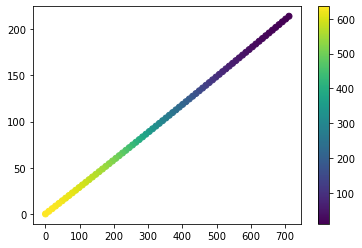

In [10]:
big_test = np.loadtxt(fname='SZ_data/kermadec/cartesian/profile_00652.xyz')
big_test_x = big_test[:, 0] - np.min(big_test[:, 0])
big_test_y = np.abs(big_test[:, 1] - np.max(big_test[:, 1]))
big_test_z = np.abs(big_test[:, 2])
plt.scatter(big_test_x, np.abs(big_test_y), c = np.abs(big_test_z))
plt.colorbar()

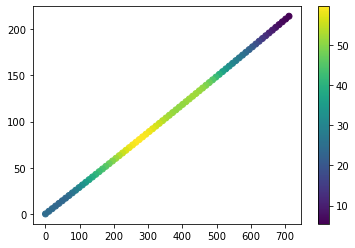

In [11]:
dip_test = np.loadtxt(fname='SZ_data/kermadec/dips/cartesian/profile_00652.xyz')
dip_test_x = dip_test[:, 0] - np.min(dip_test[:, 0])
dip_test_y = np.abs(dip_test[:, 1] - np.max(dip_test[:, 1]))
dip_test_z = np.abs(dip_test[:, 2])
plt.scatter(dip_test_x, np.abs(dip_test_y), c = np.abs(dip_test_z))
plt.colorbar()

In [12]:
segment_thickness = []
segment_length = [10.3e3]
dip_holder = [0]
slab_distances = []
for i in range(1, len(big_test_z)):
        segment_thickness.append([125e3])
        slab_distance = np.sqrt( (big_test_x[i] - big_test_x[i - 1])**2 + (big_test_y[i] - big_test_y[i - 1])**2 + (big_test_z[i] - big_test_z[i - 1])**2 )
        slab_distances.append(slab_distance)
        slab_projection = np.sqrt( (big_test_x[i] - big_test_x[i - 1])**2 + (big_test_y[i] - big_test_y[i - 1])**2 )
        riserun = (big_test_z[i - 1] - big_test_z[i]) / (slab_projection)
        segment_length.append(slab_distance * 1000)
        dip_holder.append(np.arctan(abs(riserun)) * 180 / np.pi)

dips = []
for k in range(len(dip_holder) - 1):
    if k != int(len(dip_holder) - 1):
        dips.append([dip_holder[k], dip_holder[k + 1]])
    else:
        dips.append([dip_holder[k]])

In [13]:
depths = [0, 0]
depth_val = 0
for i in range(len(dips)):
    depth_val += np.arctan(np.pi * dips[i][1] / 180) * slab_distances[i]
    depths.append(depth_val)

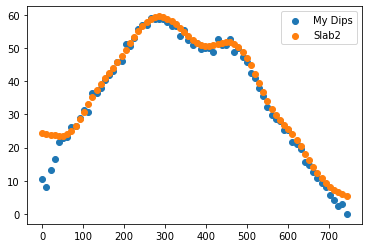

In [14]:
plt.scatter(np.sqrt(big_test_x**2 + big_test_y**2), dip_holder, label = 'My Dips')
plt.scatter(np.sqrt(dip_test_x**2 + dip_test_y**2), dip_test_z, label = 'Slab2')
plt.legend()

In [15]:
depth_total = 0
depth_slab2 = []
for i in range(len(dip_test_z)):
    depth_total += np.tan(dip_test_z[i] * np.pi / 180) * segment_length[i]
    depth_slab2.append(depth_total)
depth_total

997133.9093721581

In [16]:
depth_total = 0
depth_me = []
for i in range(len(dip_holder)):
    depth_total += np.tan(dip_holder[i] * np.pi / 180) * segment_length[i]
    depth_me.append(depth_total)
depth_total

958913.332753194

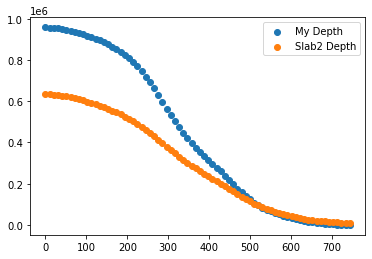

In [17]:
plt.scatter(np.sqrt(big_test_x**2 + big_test_y**2), depth_me, label = 'My Depth')
plt.scatter(np.sqrt(big_test_x**2 + big_test_y**2), big_test_z*1e3, label = 'Slab2 Depth')
plt.legend()

# Write out the World Builder File for this Profile, since it should have VERY good agreement to the slab2 data

In [129]:
sys('rm ../world_builder_files/pyvista_2D.wb')
sys('rm -r SZ_data/kermadec/special_cart/.ipynb_checkpoints')
world_builder_file = open('../world_builder_files/pyvista_2D.wb', 'a+')
world_builder_file.write('{\n')
world_builder_file.write('  "version":"0.5",\n')
world_builder_file.write('  "interpolation":"continuous monotone spline",\n')
world_builder_file.write('  "features":\n')
world_builder_file.write('  [\n\n')


###################################################################################################################################################

model_name = 'mantle layer'
feature_name = 'Upper Mantle'
min_depth = 125e3
max_depth = 660e3
coordinates = [[0.0, 0.0], [0.0, 5000e3], [4000e3, 5000e3], [4000e3, 0.0]]

temp_name = 'linear'
temp_max = 660e3
temp_min = 125e3
bot_temp = 1820
top_temp = 1600

comp_name = 'uniform'
comp_0 = 0
max_0 = 660e3
min_0 = 125e3

world_builder_file.write('{\n')
world_builder_file.write(wb_writer.model_feature_string(model_name, feature_name, min_depth, max_depth, coordinates, is_subducting=False, dip_point=0))
world_builder_file.write(wb_writer.linear_model(temp_name, temp_max, temp_min, bot_temp, top_temp, 'both'))
world_builder_file.write(wb_writer.composition_feature_string(comp_name, comp_0, max_0, min_0, is_subducting=False, first_last='both'))
world_builder_file.write('},\n\n')

###################################################################################################################################################

model_name = 'mantle layer'
feature_name = 'Lower Mantle'
min_depth = 660e3
max_depth = 2891e3

temp_name = 'linear'
temp_max = 2891e3
temp_min = 660e3
bot_temp = 3000
top_temp = 1820

comp_name = 'uniform'
comp_1 = 1
max_1 = 2891e3
min_1 = 660e3

world_builder_file.write('{\n')
world_builder_file.write(wb_writer.model_feature_string(model_name, feature_name, min_depth, max_depth, coordinates, is_subducting=False, dip_point=0))
world_builder_file.write(wb_writer.linear_model(temp_name, temp_max, temp_min, bot_temp, top_temp, 'both'))
world_builder_file.write(wb_writer.composition_feature_string(comp_name, comp_1, max_1, min_1, is_subducting=False, first_last='both'))
world_builder_file.write('},\n\n')

###################################################################################################################################################
xshift = 2000
yshift = 2500
trench_x, trench_y = wb_writer.trench_extractor('SZ_data/kermadec/special_cart/', xshift, yshift, 'East', 'Cartesian')

feature_coordinates =  []
for i in range(len(trench_x)):
    feature_coordinates.append( [trench_x[i], trench_y[i]] )

is_subducting = True
dip_point = [-2000e8, 2000e3]
temp_features = 'half space model'

model_name = 'oceanic plate'
feature_name = 'oceanic plate'
x_bounds = [0, 4000e3]
y_bounds = [0, 5000e3]
ocean_coords, cont_coords = wb_writer.trench_splitter(trench_x, trench_y, x_bounds, y_bounds, 'East')

min_depth = 0.0
max_depth = 125e3
temp_name = 'half space model'
temp_max = 125e3
temp_min = 0.0
bot_temp = 1600
top_temp = 300
spr_vel = 0.005
ridge_coords = [[[4001e3, 0.0], [4001e3, 5000000.0]]]

comp_name = 'uniform'
comp_3 = 3
max_3 = 125e3
min_3 = 0

world_builder_file.write('{\n')
world_builder_file.write(wb_writer.model_feature_string(model_name, 'oceanic plate', min_depth, max_depth, ocean_coords, is_subducting=False, dip_point=0))
world_builder_file.write(wb_writer.cooling_model(temp_name, temp_max, temp_min, bot_temp, top_temp, spr_vel, ridge_coords, first_last='both'))
world_builder_file.write(wb_writer.composition_feature_string(comp_name, comp_3, max_3, min_3, is_subducting=False, first_last='both'))
world_builder_file.write('},\n\n')

###################################################################################################################################################

model_name = 'continental plate'
feature_name = 'continental plate'
min_depth = 0
max_depth = 125e3

temp_name = 'linear'
temp_max = 125e3
temp_min = 0.0
bot_temp = 1600
top_temp = 300

comp_name = 'uniform'
comp_4 = 4
max_4 = 125e3
min_4 = 0

world_builder_file.write('{\n')
world_builder_file.write(wb_writer.model_feature_string(model_name, feature_name, min_depth, max_depth, cont_coords, is_subducting=False, dip_point=0))
world_builder_file.write(wb_writer.linear_model(temp_name, temp_max, temp_min, bot_temp, top_temp, 'both'))
world_builder_file.write(wb_writer.composition_feature_string(comp_name, comp_4, max_4, min_4, is_subducting=False, first_last='both'))
world_builder_file.write('},\n\n')

###################################################################################################################################################

feature_names_list = 'Kermadec Slab'
feature_types = 'subducting plate'
profile_directory = 'SZ_data/kermadec/special_cart/'
sys('rm -rf ../data/plateau_directory/cartesian/.ipynb_checkpoints')
directory_path = 'SZ_data/kermadec/special_cart/'
segment_thickness = []
for file in np.sort(os.listdir(directory_path)):
    file_loc = os.path.join(directory_path, file)
    track_x = np.loadtxt(fname=file_loc, usecols=0) + xshift
    track_y = np.loadtxt(fname=file_loc, usecols=1) + yshift
    track_z = np.abs(np.loadtxt(fname=file_loc, usecols=2))
    thick_element = [ [150e3, np.min(track_z)], [125e3, 2000] ]
    segment_thickness.append(thick_element)
segment_thickness = np.array(segment_thickness)

world_builder_file.write('    {' + wb_writer.model_feature_string(feature_types, feature_names_list, 0, 10000e3, feature_coordinates, is_subducting, \
                                                 dip_point))
wb_writer.segment_section(world_builder_file, profile_directory, xshift, yshift, segment_thickness)

density = 3300
plate_vel = 0.005
couple_depth = 125e3
shallow_dip = 20
taper = 0
max_slab_top = 250e3
min_slab_top = -250e3
first_last = 'both'

world_builder_file.write('    ],\n')
world_builder_file.write(wb_writer.mass_conserving_model(density, plate_vel, couple_depth, shallow_dip, ridge_coords, taper, max_slab_top, min_slab_top, first_last))
# world_builder_file.write(temperature_feature.uniform_model('uniform', 500, 'add', 'both'))
world_builder_file.write(wb_writer.composition_feature_string(comp_name, 3, 100000e3, 0, True, 'both'))
world_builder_file.write('},\n\n')

###################################################################################################################################################

model_name = 'oceanic plate'
min_depth = 0.0
max_depth = 10e3

temp_name = 'half space model'
temp_max = 10e3
temp_min = 0.0
bot_temp = 1600
top_temp = 300
spr_vel = 0.005

comp_name = 'uniform'
comp_2 = 2
max_2 = 10e3
min_2 = 0

world_builder_file.write('{\n')
world_builder_file.write(wb_writer.model_feature_string(model_name, 'oceanic crust', min_depth, max_depth, ocean_coords, is_subducting=False, dip_point=0))
world_builder_file.write(wb_writer.cooling_model(temp_name, temp_max, temp_min, bot_temp, top_temp, spr_vel, ridge_coords, first_last='both'))
world_builder_file.write(wb_writer.composition_feature_string(comp_name, comp_2, max_2, min_2, is_subducting=False, first_last='both'))
world_builder_file.write('},\n\n')

###################################################################################################################################################

feature_names_list = 'Kermadec Crust'
feature_types = 'subducting plate'
profile_directory = 'SZ_data/kermadec/special_cart/'
segment_thickness = 125e3

world_builder_file.write('    {' + wb_writer.model_feature_string(feature_types, feature_names_list, 0, 130e3, feature_coordinates, is_subducting, \
                                                 dip_point))

wb_writer.segment_section(world_builder_file, profile_directory, xshift, yshift, segment_thickness)

###################################################################################################################################################
        
world_builder_file.write('    ],\n')
world_builder_file.write(wb_writer.uniform_model('uniform', 20, 'add', 'both'))
world_builder_file.write(wb_writer.composition_feature_string(comp_name, 2, 10e3, 0, True, 'both'))
world_builder_file.write('}\n')
world_builder_file.write('')
world_builder_file.write(']\n')
world_builder_file.write('}')
world_builder_file.close()

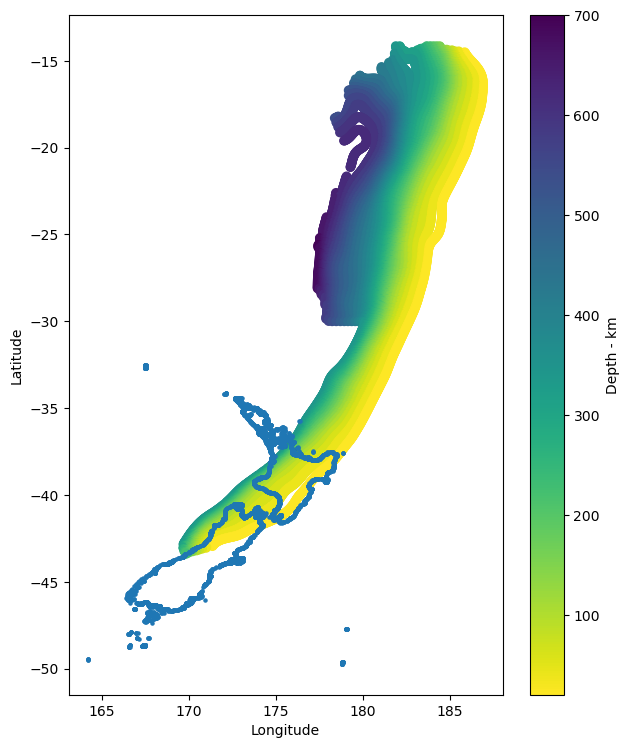

In [19]:
plt.figure(dpi=100, figsize=(7,9))
plt.scatter(slab2_cont[:, 0], slab2_cont[:, 1], c = abs(slab2_cont[:, 2]), cmap='viridis_r')
plt.colorbar(label = 'Depth - km')
plt.scatter(coast_arr[:, 0], coast_arr[:, 1], s=5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [20]:
test = np.loadtxt(fname='../data/slab_supplement.csv', skiprows=1, delimiter=',')
lon_t = test[:, 0]
lat_t = test[:, 1]
depth_t = test[:, 2]
slab2_dep = np.loadtxt(fname='SZ_data/kermadec/slab2_tonga.xyz', delimiter=',', comments='>')
slab_500 = np.loadtxt(fname='../data/slab_500km.txt')

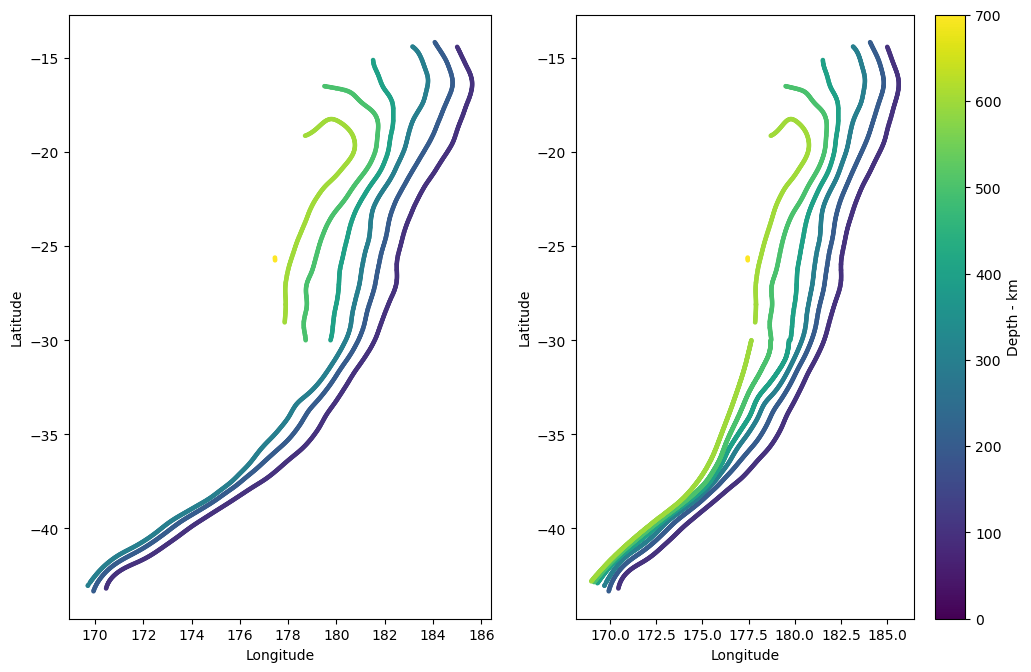

In [21]:
ind_400 = np.where(depth_t == 399.51)
ind_500 = np.where(depth_t == 499.58)
ind_600 = np.where(depth_t == 597.43)
slab2_ind_100 = np.where(slab2_cont[:, 2] == -100)
slab2_ind_200 = np.where(slab2_cont[:, 2] == -200)
slab2_ind_300 = np.where(slab2_cont[:, 2] == -300)
slab2_ind_400 = np.where(slab2_cont[:, 2] == -400)
slab2_ind_500 = np.where(slab2_cont[:, 2] == -500)
slab2_ind_600 = np.where(slab2_cont[:, 2] == -600)
slab2_ind_700 = np.where(slab2_cont[:, 2] == -700)

plt.figure(dpi=100, figsize=(12,8))
plt.subplot(1, 2, 1)
plt.scatter(slab2_cont[:, 0][slab2_ind_100], slab2_cont[:, 1][slab2_ind_100], c = abs(slab2_cont[:, 2][slab2_ind_100]), cmap='viridis', s=5, vmin=0, vmax=700)
plt.scatter(slab2_cont[:, 0][slab2_ind_200], slab2_cont[:, 1][slab2_ind_200], c = abs(slab2_cont[:, 2][slab2_ind_200]), cmap='viridis', s=5, vmin=0, vmax=700)
plt.scatter(slab2_cont[:, 0][slab2_ind_300], slab2_cont[:, 1][slab2_ind_300], c = abs(slab2_cont[:, 2][slab2_ind_300]), cmap='viridis', s=5, vmin=0, vmax=700)
plt.scatter(slab2_cont[:, 0][slab2_ind_400], slab2_cont[:, 1][slab2_ind_400], c = abs(slab2_cont[:, 2][slab2_ind_400]), cmap='viridis', s=5, vmin=0, vmax=700)
plt.scatter(slab2_cont[:, 0][slab2_ind_500], slab2_cont[:, 1][slab2_ind_500], c = abs(slab2_cont[:, 2][slab2_ind_500]), cmap='viridis', s=5, vmin=0, vmax=700)
plt.scatter(slab2_cont[:, 0][slab2_ind_600], slab2_cont[:, 1][slab2_ind_600], c = abs(slab2_cont[:, 2][slab2_ind_600]), cmap='viridis', s=5, vmin=0, vmax=700)
plt.scatter(slab2_cont[:, 0][slab2_ind_700], slab2_cont[:, 1][slab2_ind_700], c = abs(slab2_cont[:, 2][slab2_ind_700]), cmap='viridis', s=5, vmin=0, vmax=700)


# plt.scatter(lon_t[ind_400], lat_t[ind_400], c=abs(depth_t[ind_400]), s=5, vmin=0, vmax=700)
# plt.scatter(lon_t[ind_500], lat_t[ind_500], c=abs(depth_t[ind_500]), s=5, vmin=0, vmax=700)
# plt.colorbar(label = 'Depth - km')
# plt.scatter(lon_t[ind_600], lat_t[ind_600], c=abs(depth_t[ind_600]), s=5, vmin=0, vmax=700)
# plt.scatter(slab_500[:, 3], slab_500[:, 4], c = 'r', marker = 'x', s = 50, label = '500km Depth')

#plt.scatter(coast_arr[:, 0], coast_arr[:, 1], s=5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.subplot(1, 2, 2)
plt.scatter(slab2_cont[:, 0][slab2_ind_100], slab2_cont[:, 1][slab2_ind_100], c = abs(slab2_cont[:, 2][slab2_ind_100]), cmap='viridis', s=5, vmin=0, vmax=700)
plt.scatter(slab2_cont[:, 0][slab2_ind_200], slab2_cont[:, 1][slab2_ind_200], c = abs(slab2_cont[:, 2][slab2_ind_200]), cmap='viridis', s=5, vmin=0, vmax=700)
plt.scatter(slab2_cont[:, 0][slab2_ind_300], slab2_cont[:, 1][slab2_ind_300], c = abs(slab2_cont[:, 2][slab2_ind_300]), cmap='viridis', s=5, vmin=0, vmax=700)
plt.scatter(slab2_cont[:, 0][slab2_ind_400], slab2_cont[:, 1][slab2_ind_400], c = abs(slab2_cont[:, 2][slab2_ind_400]), cmap='viridis', s=5, vmin=0, vmax=700)
plt.scatter(slab2_cont[:, 0][slab2_ind_500], slab2_cont[:, 1][slab2_ind_500], c = abs(slab2_cont[:, 2][slab2_ind_500]), cmap='viridis', s=5, vmin=0, vmax=700)
plt.scatter(slab2_cont[:, 0][slab2_ind_600], slab2_cont[:, 1][slab2_ind_600], c = abs(slab2_cont[:, 2][slab2_ind_600]), cmap='viridis', s=5, vmin=0, vmax=700)
plt.scatter(slab2_cont[:, 0][slab2_ind_700], slab2_cont[:, 1][slab2_ind_700], c = abs(slab2_cont[:, 2][slab2_ind_700]), cmap='viridis', s=5, vmin=0, vmax=700)


plt.scatter(lon_t[ind_400], lat_t[ind_400], c=abs(depth_t[ind_400]), s=5, vmin=0, vmax=700)
plt.scatter(lon_t[ind_500], lat_t[ind_500], c=abs(depth_t[ind_500]), s=5, vmin=0, vmax=700)
plt.colorbar(label = 'Depth - km')
plt.scatter(lon_t[ind_600], lat_t[ind_600], c=abs(depth_t[ind_600]), s=5, vmin=0, vmax=700)
#plt.scatter(slab_500[:, 3], slab_500[:, 4], c = 'r', marker = 'x', s = 50, label = '500km Depth')

#plt.scatter(coast_arr[:, 0], coast_arr[:, 1], s=5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

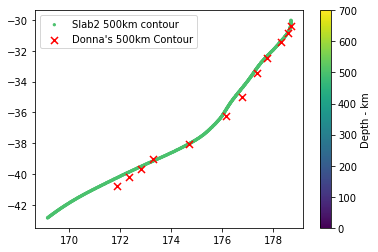

In [22]:
plt.scatter(lon_t[ind_500], lat_t[ind_500], c=abs(depth_t[ind_500]), s=5, vmin=0, vmax=700, label = 'Slab2 500km contour')
plt.colorbar(label = 'Depth - km')
plt.scatter(slab_500[:, 3], slab_500[:, 4], c = 'r', marker = 'x', s = 50, label = "Donna's 500km Contour")
plt.legend()